**TASK1......**


TASK 1: BORN RULE - MEASUREMENT PROBABILITIES
Superposition state 1: |ψ₁⟩ = [0.70710678 0.70710678]
Measurement probabilities: [0.5 0.5]
Superposition state 2: |ψ₂⟩ = [0.57735027 0.81649658]
Measurement probabilities: [0.33333333 0.66666667]


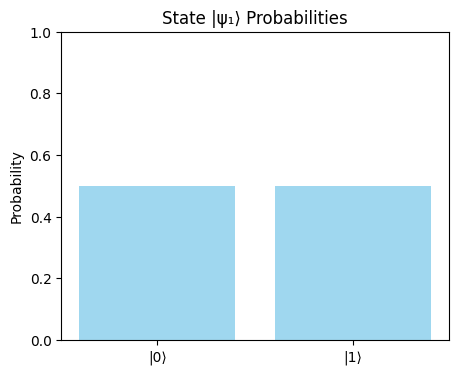

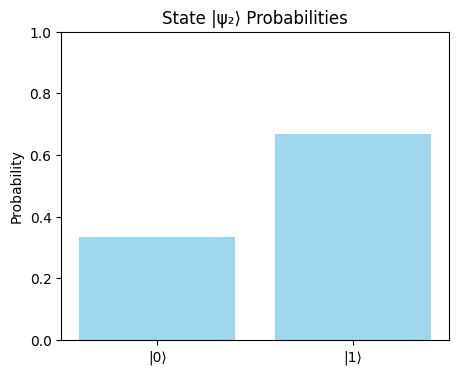

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def born_rule_probabilities(psi):
    """Calculates measurement probabilities using the Born rule."""
    probabilities = np.abs(psi)**2
    return probabilities / np.sum(probabilities)

def visualize_probabilities(states, probabilities, title):
    """Visualizes the measurement probabilities as a bar chart."""
    plt.figure(figsize=(5, 4))
    plt.bar(states, probabilities, color='skyblue', alpha=0.8)
    plt.title(title)
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.show()

def main():
    """Main function to demonstrate the Born rule."""
    print("\n" + "="*50)
    print("TASK 1: BORN RULE - MEASUREMENT PROBABILITIES")
    print("="*50)

    # Define quantum states
    psi_1 = np.array([1/np.sqrt(2), 1/np.sqrt(2)])  # |+⟩ state
    psi_2 = np.array([1/np.sqrt(3), np.sqrt(2/3)])  # Custom superposition

    # Calculate and print probabilities
    probs_1 = born_rule_probabilities(psi_1)
    probs_2 = born_rule_probabilities(psi_2)

    print(f"Superposition state 1: |ψ₁⟩ = {psi_1}")
    print(f"Measurement probabilities: {probs_1}")
    print(f"Superposition state 2: |ψ₂⟩ = {psi_2}")
    print(f"Measurement probabilities: {probs_2}")

    # Visualize the results
    states = ['|0⟩', '|1⟩']
    visualize_probabilities(states, probs_1, 'State |ψ₁⟩ Probabilities')
    visualize_probabilities(states, probs_2, 'State |ψ₂⟩ Probabilities')

if __name__ == '__main__':
    main()

**TASK2........**

In [2]:
print("\n" + "="*50)
print("TASK 2: PAULI MATRICES AND EIGEN-ANALYSIS")
print("="*50)
# Define Pauli matrices
pauli_x = np.array([[0, 1], [1, 0]])
pauli_y = np.array([[0, -1j], [1j, 0]])
pauli_z = np.array([[1, 0], [0, -1]])
print("Pauli-X matrix:")
print(pauli_x)
print("\nPauli-Y matrix:")
print(pauli_y)
print("\nPauli-Z matrix:")
print(pauli_z)
# Apply to qubit states
qubit_0 = np.array([1, 0]) # |0⟩
qubit_1 = np.array([0, 1]) # |1⟩
print("\nApplying Pauli-X to |0⟩:", pauli_x @ qubit_0)
print("Applying Pauli-X to |1⟩:", pauli_x @ qubit_1)
# Compute eigenvalues and eigenvectors
def analyze_operator(matrix, name):
    eigenvals, eigenvecs = np.linalg.eig(matrix)
    print(f"\n{name} Eigenvalues:", eigenvals)
    print(f"{name} Eigenvectors:")
    for i, vec in enumerate(eigenvecs.T):
        print(f" λ={eigenvals[i]:.1f}: {vec}")

analyze_operator(pauli_x, "Pauli-X")
analyze_operator(pauli_y, "Pauli-Y")
analyze_operator(pauli_z, "Pauli-Z")





TASK 2: PAULI MATRICES AND EIGEN-ANALYSIS
Pauli-X matrix:
[[0 1]
 [1 0]]

Pauli-Y matrix:
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

Pauli-Z matrix:
[[ 1  0]
 [ 0 -1]]

Applying Pauli-X to |0⟩: [0 1]
Applying Pauli-X to |1⟩: [1 0]

Pauli-X Eigenvalues: [ 1. -1.]
Pauli-X Eigenvectors:
 λ=1.0: [0.70710678 0.70710678]
 λ=-1.0: [-0.70710678  0.70710678]

Pauli-Y Eigenvalues: [ 1.+0.j -1.+0.j]
Pauli-Y Eigenvectors:
 λ=1.0+0.0j: [-0.        -0.70710678j  0.70710678+0.j        ]
 λ=-1.0+0.0j: [0.70710678+0.j         0.        -0.70710678j]

Pauli-Z Eigenvalues: [ 1. -1.]
Pauli-Z Eigenvectors:
 λ=1.0: [1. 0.]
 λ=-1.0: [0. 1.]


**TASK3......**

**3(1)**

In [3]:
import numpy as np
import math
from math import log2 # Import log2
print("\n" + "="*50)
print("TASK 3: BELL STATES AND ENTANGLEMENT ENTROPY")
print("="*50)
# Define quantum gates
H = 1/math.sqrt(2) * np.array([[1, 1], [1, -1]]) # Hadamard gate
I = np.eye(2) # Identity gate
CNOT = np.array([[1,0,0,0], [0,1,0,0], [0,0,0,1], [0,0,1,0]]) # CNOT gate

class BellStates:
    @staticmethod
    def phi_plus():
        """Construct |Φ⁺⟩ = (|00⟩ + |11⟩)/√2"""
        state = np.kron([1, 0], [1, 0])  # |00⟩
        state = np.kron(H, I) @ state  # Apply H to first qubit
        return CNOT @ state  # Apply CNOT

    @staticmethod
    def phi_minus():
        """Construct |Φ⁻⟩ = (|00⟩ - |11⟩)/√2"""
        state = np.kron([1, 0], [1, 0])  # |00⟩
        state = np.kron(H, I) @ state
        bell = CNOT @ state
        # Flip sign of |11⟩ component
        bell[3] *= -1
        return bell

    @staticmethod
    def psi_plus():
        """Construct |Ψ⁺⟩ = (|01⟩ + |10⟩)/√2"""
        state = np.kron([1, 0], [0, 1])  # |01⟩
        state = np.kron(H, I) @ state
        return CNOT @ state

    @staticmethod
    def psi_minus():
        """Construct |Ψ⁻⟩ = (|01⟩ - |10⟩)/√2"""
        state = np.kron([1, 0], [0, 1])  # |01⟩
        state = np.kron(H, I) @ state
        bell = CNOT @ state
        # Flip sign of |10⟩ component
        bell[2] *= -1
        return bell

def partial_trace(rho, dims, axis=0):
    """
    Compute partial trace of density matrix rho
    dims: list of dimensions of each subsystem [dA, dB]
    axis: 0 for tracing out B, 1 for tracing out A
    """
    dA, dB = dims
    if axis == 0:  # Trace out B
        rho_reduced = np.zeros((dA, dA), dtype=complex)
        for i in range(dA):
            for j in range(dA):
                for k in range(dB):
                    rho_reduced[i, j] += rho[i * dB + k, j * dB + k]
    else:  # Trace out A
        rho_reduced = np.zeros((dB, dB), dtype=complex)
        for i in range(dB):
            for j in range(dB):
                for k in range(dA):
                    rho_reduced[i, j] += rho[k * dB + i, k * dB + j]
    return rho_reduced

def entanglement_entropy(state):
    """
    Calculate entanglement entropy of bipartite state
    Input: state vector or density matrix
    Output: entanglement entropy
    """
    # Convert state to density matrix if it's a state vector
    if state.ndim == 1:
        rho = np.outer(state, state.conj())
    else:
        rho = state

    # Partial trace over subsystem B (assuming 2-qubit system)
    rho_A = partial_trace(rho, [2, 2], axis=1)

    # Compute eigenvalues (using eigh for Hermitian matrices)
    eigvals = np.linalg.eigvalsh(rho_A)

    # Calculate von Neumann entropy
    entropy = 0.0
    for lamda in eigvals:
        if lamda > 1e-10:  # avoid log(0)
            entropy -= lamda * log2(lamda)

    return entropy

# Example usage
if __name__ == "__main__":
    # Construct Bell states
    phi_p = BellStates.phi_plus()
    phi_m = BellStates.phi_minus()
    psi_p = BellStates.psi_plus()
    psi_m = BellStates.psi_minus()

    # Print Bell states
    print(f"Bell state |Φ⁺⟩ = {phi_p}")
    print(f"Bell state |Φ⁻⟩ = {phi_m}")
    print(f"Bell state |Ψ⁺⟩ = {psi_p}")
    print(f"Bell state |Ψ⁻⟩ = {psi_m}")

    # Verify entanglement entropy (should be 1 for maximally entangled states)
    print(f"\nEntanglement entropy of |Φ⁺⟩: {entanglement_entropy(phi_p):.4f}")
    print(f"Entanglement entropy of |Φ⁻⟩: {entanglement_entropy(phi_m):.4f}")
    print(f"Entanglement entropy of |Ψ⁺⟩: {entanglement_entropy(psi_p):.4f}")
    print(f"Entanglement entropy of |Ψ⁻⟩: {entanglement_entropy(psi_m):.4f}")

    # Verify product state has zero entanglement entropy
    product_state = np.kron([1, 0], [1, 0])  # |00⟩
    print(f"\nEntanglement entropy of |00⟩: {entanglement_entropy(product_state):.4f}")


TASK 3: BELL STATES AND ENTANGLEMENT ENTROPY
Bell state |Φ⁺⟩ = [0.70710678 0.         0.         0.70710678]
Bell state |Φ⁻⟩ = [ 0.70710678  0.          0.         -0.70710678]
Bell state |Ψ⁺⟩ = [0.         0.70710678 0.70710678 0.        ]
Bell state |Ψ⁻⟩ = [ 0.          0.70710678 -0.70710678  0.        ]

Entanglement entropy of |Φ⁺⟩: 1.0000
Entanglement entropy of |Φ⁻⟩: 1.0000
Entanglement entropy of |Ψ⁺⟩: 1.0000
Entanglement entropy of |Ψ⁻⟩: 1.0000

Entanglement entropy of |00⟩: 0.0000


**3(2)**

In [4]:
!pip install qiskit
!pip install qiskit_aer
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, partial_trace, entropy
from qiskit_aer import AerSimulator
import numpy as np
import pandas as pd

# Initialize simulator
simulator = AerSimulator()

def create_bell_state(bell_type):
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    if bell_type == 'phi_minus':
        qc.z(0)
    elif bell_type == 'psi_plus':
        qc.x(1)
    elif bell_type == 'psi_minus':
        qc.z(0)
        qc.x(1)
    return qc

def calculate_entropy(qc):
    statevector = Statevector.from_instruction(qc)
    rho = partial_trace(statevector, [1])
    return entropy(rho, base=2)

state_data = []
states = {
    'phi_plus': '|Φ⁺⟩',
    'phi_minus': '|Φ⁻⟩',
    'psi_plus': '|Ψ⁺⟩',
    'psi_minus': '|Ψ⁻⟩',
    'product': '|00⟩'
}

print("Bell States Construction and Entanglement Analysis")
print("="*50)

for key, label in states.items():
    if key == 'product':
        qc = QuantumCircuit(2)
        print("\nProduct State:")
    else:
        qc = create_bell_state(key)
        print(f"\nBell State {label}:")

    # Display circuit
    print("Quantum Circuit:")
    print(qc)

    # Calculate and display results
    entropy_val = calculate_entropy(qc)
    statevector = Statevector.from_instruction(qc)

    print("\nStatevector:")
    print(np.round(statevector.data, 3))

    print(f"Entanglement Entropy: {round(entropy_val, 3)}")
    print("-"*40)

    state_data.append({
        'State': label,
        'Entanglement Entropy': round(entropy_val, 3),
        'Score (out of 1)': f"{round(entropy_val, 3)}/1"
    })

# Create and display summary table
print("\nSummary Table:")
print("="*50)
df = pd.DataFrame(state_data)
print(df.to_string(index=False))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.2 MB/s eta 0:00:00
Bell States Construction and Entanglement Analysis

Bell State |Φ⁺⟩:
Quantum Circuit:
     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

Statevector:
[0.707+0.j 0.   +0.j 0.   +0.j 0.707+0.j]
Entanglement Entropy: 1.0
----------------------------------------

Bell State |Φ⁻⟩:
Quantum Circuit:
     ┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ Z ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘     

Statevector:
[ 0.707+0.j  0.   +0.j  0.   +0.j -0.707+0.j]
Entanglement Entropy: 1.0
----------------------------------------

Bell State |Ψ⁺⟩:
Quantum Circuit:
     ┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐┌───┐
q_1: ─────┤ X ├┤ X ├
          └───

**TASK4.........**

In [5]:
!pip install cirq
import numpy as np
import cmath
print("\n" + "="*50)
print("TASK 4: COMMUTATION RELATIONS AND EULER ANGLES")
print("="*50)
# --- Part 1: Verify Pauli commutation & anti-commutation with SymPy ---
import sympy as sp
I = sp.eye(2)
sx = sp.Matrix([[0, 1], [1, 0]])
sy = sp.Matrix([[0, -sp.I], [sp.I, 0]])
sz = sp.Matrix([[1, 0], [0, -1]])
paulis = {'X': sx, 'Y': sy, 'Z': sz}
def comm(A, B):
 return sp.simplify(A * B - B * A)
def anti(A, B):
 return sp.simplify(A * B + B * A)
print("\n=== Commutation relations ===")
for (a, b, k) in [('X', 'Y', 'Z'), ('Y', 'Z', 'X'), ('Z', 'X', 'Y')]:
 lhs = comm(paulis[a], paulis[b])
 rhs = 2 * sp.I * paulis[k]
 print(f"[{a},{b}] =\n{lhs}\nExpected:\n{rhs}\n")
print("\n=== Anti-commutation relations ===")
for i in ['X', 'Y', 'Z']:
 for j in ['X', 'Y', 'Z']:
  lhs = anti(paulis[i], paulis[j])
  rhs = 2 * (1 if i == j else 0) * I
  print(f"{{{i},{j}}} =\n{lhs} Expected:\n{rhs}\n")
# --- Part 2: Z–Y–Z Euler decomposition ---
def is_unitary(U, tol=1e-8):
 return np.allclose(U.conj().T @ U, np.eye(2), atol=tol)
def decompose_zyz(U, tol=1e-8):
 """Return (phi, alpha, beta, gamma) such that
 U = e^{i phi} Rz(alpha) Ry(beta) Rz(gamma)
 """
 U = np.array(U, dtype=complex)
 if not is_unitary(U):
  raise ValueError("Mat   rix is not unitary.")
 detU = np.linalg.det(U)
 phi = cmath.phase(detU) / 2
 U0 = U * np.exp(-1j * phi)
 detU0 = np.linalg.det(U0)
 U0 = U0 / np.sqrt(detU0)
 a = U0[0, 0]
 b = U0[0, 1]
 beta = 2 * np.arccos(min(1.0, max(0.0, abs(a))))
 if np.isclose(np.sin(beta / 2), 0, atol=tol):
  alpha = 2 * (-cmath.phase(a))
  gamma = 0.0
 else:
  phi1 = -cmath.phase(a)
  phi2 = -cmath.phase(-b)
  alpha = phi1 + phi2
  gamma = phi1 - phi2
 return float(phi), float(alpha), float(beta), float(gamma)
def Rz(theta):
  return np.array([[np.exp(-1j * theta / 2), 0],
 [0, np.exp(1j * theta / 2)]], dtype=complex)
def Ry(theta):
 return np.array([[np.cos(theta / 2), -np.sin(theta / 2)],
 [np.sin(theta / 2), np.cos(theta / 2)]],
dtype=complex)
def reconstruct(phi, alpha, beta, gamma):
 return np.exp(1j * phi) @ (Rz(alpha) @ Ry(beta) @ Rz(gamma))
# --- Part 3: Test examples ---
def Rx(theta):
 return np.cos(theta / 2) * np.eye(2) - 1j * np.sin(theta / 2) * sx
examples = {
 "Rx(pi/3)": Rx(np.pi / 3),
 "Ry(pi/4)": Ry(np.pi / 4),
 "Rz(pi/2)": Rz(np.pi / 2),
 "H": (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]],
dtype=complex),
 "S": np.array([[1, 0], [0, 1j]], dtype=complex),
 "T": np.array([[1, 0], [0, np.exp(1j * np.pi / 4)]],
dtype=complex),
}
print("\n=== Z–Y–Z Euler Decomposition ===")
for name, U in examples.items():
 phi, alpha, beta, gamma = decompose_zyz(U)
 print(f"{name}:\n φ={phi:.6f}, α={alpha:.6f}, β={beta:.6f},"
" γ={gamma:.6f}\n")
# Optional: Use Cirq if available
try:
 import cirq
 print("\nCirq example decomposition for H gate:")
 # Create a qubit and turn H into an operation
 q = cirq.LineQubit(0)
 H_op = cirq.H(q)
 # Extract the unitary matrix of H
 U = cirq.unitary(H_op)
 # Perform Z–Y–Z decomposition
 phi, alpha, beta, gamma = decompose_zyz(U)
 print(f"Cirq H: φ={phi:.6f}, α={alpha:.6f}, β={beta:.6f},"
" γ={gamma:.6f}")
except ImportError:
 print("\nCirq not installed. Skipping Cirq examples.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 45.0 MB/s eta 0:00:00

TASK 4: COMMUTATION RELATIONS AND EULER ANGLES

=== Commutation relations ===
[X,Y] =
Matrix([[2*I, 0], [0, -2*I]])
Expected:
Matrix([[2*I, 0], [0, -2*I]])

[Y,Z] =
Matrix([[0, 2*I], [2*I, 0]])
Expected:
Matrix([[0, 2*I], [2*I, 0]])

[Z,X] =
Matrix([[0, 2], [-2, 0]])
Expected:
Matrix([[0, 2], [-2, 0]])


=== Anti-commutation relations ===
{X,X} =
Matrix([[2, 0], [0, 2]]) Expected:
Matrix([[2, 0], [0, 2]])

{X,Y} =
Matrix([[0, 0], [0, 0]]) Expected:
Matrix([[0, 0], [0, 0]])

{X,Z} =
Matrix([[0, 0], [0, 0]]) Expected:
Matrix([[0, 0], [0, 0]])

{Y,X} =
Matrix([[0, 0], [0, 0]]) Expected:
Matrix([[0, 0]

**TASK5.......**

In [6]:
!pip install qiskit
!pip install qiskit_aer
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
def cnot_circuit(input_state):
 """
 Creates and simulates a CNOT circuit for a given input
state.
 Args:
 input_state (str): '00', '01', '10', or '11'
 """
 qc = QuantumCircuit(2, 2) # 2 qubits, 2 classical bits
 # Prepare input state
 if input_state[0] == '1':
  qc.x(0) # Set q0 to |1⟩
 if input_state[1] == '1':
  qc.x(1) # Set q1 to |1⟩
 # Apply CNOT (q0=control, q1=target)
 qc.cx(0, 1)
 # Measure qubits
 qc.measure([0, 1], [0, 1])
 # Simulate
 simulator = Aer.get_backend('qasm_simulator')
 result = simulator.run(qc, shots=1000).result()
 counts = result.get_counts(qc)
 # Plot results
 print(f"\nCNOT Gate Test | Input: |{input_state}⟩")
 print("Circuit Diagram:")
 print(qc.draw(output='text'))
 plot_histogram(counts)
 plt.show()
# Test all possible inputs
for state in ['00', '01', '10', '11']:
 cnot_circuit(state)


CNOT Gate Test | Input: |00⟩
Circuit Diagram:
          ┌─┐   
q_0: ──■──┤M├───
     ┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├─╫─┤M├
     └───┘ ║ └╥┘
c: 2/══════╩══╩═
           0  1 

CNOT Gate Test | Input: |01⟩
Circuit Diagram:
               ┌─┐   
q_0: ───────■──┤M├───
     ┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

CNOT Gate Test | Input: |10⟩
Circuit Diagram:
     ┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 

CNOT Gate Test | Input: |11⟩
Circuit Diagram:
     ┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     ├───┤┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├─╫─┤M├
     └───┘└───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [7]:

.0from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
# Create circuit
qc = QuantumCircuit(3, 2) # 3 qubits, 2 classical bits
# Step 1: Prepare Alice's state (|1⟩ for demo)
qc.x(0) # Comment out to teleport |0⟩
qc.barrier()
# Step 2: Create Bell pair (q1 & q2)
qc.h(1)
qc.cx(1, 2)
qc.barrier()
# Step 3: Teleportation protocol
qc.cx(0, 1)
qc.h(0)
qc.barrier()
# Step 4: Measure Alice's qubits
qc.measure([0,1], [0,1])
qc.barrier()
# Step 5: Bob's corrections
qc.cx(1, 2) # X if c1=1
qc.cz(0, 2) # Z if c0=1
# Step 6: Measure Bob's qubit
qc.measure(2, 0) # Overwrite c0 for verification
# Draw circuit
print("Teleportation Circuit:")
print(qc.draw(output='text'))
# Simulate
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts(qc)
# Results
print("\nMeasurement results:")
print(counts)
plot_histogram(counts)
plt.show()

SyntaxError: invalid decimal literal (ipython-input-858778536.py, line 1)

**TASK6.....**

In [ ]:
# Re-install qiskit and qiskit-aer
!pip install qiskit
!pip install qiskit_aer
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.quantum_info import Statevector, state_fidelity
from qiskit.visualization import plot_histogram
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt
import numpy as np
# -----------------------------
# Step 1: Correct Shor encoding circuit
# -----------------------------
def shor_encode():
 qc = QuantumCircuit(9, name="ShorEncode")

 # First layer: Bit-flip protection (3-qubit repetition codes)
 qc.cx(0, 3)
 qc.cx(0, 6)

 # Second layer: Phase-flip protection
 qc.h(0)
 qc.h(3)
 qc.h(6)

 qc.cx(0, 1)
 qc.cx(0, 2)
 qc.cx(3, 4)
 qc.cx(3, 5)
 qc.cx(6, 7)
 qc.cx(6, 8)

 return qc
# -----------------------------
# Step 2: Simplified syndrome measurement
# -----------------------------
def measure_syndromes():
 # Create a simpler syndrome measurement without extra qubits
 qc = QuantumCircuit(9, 6, name="SyndromeMeasurement")

 # For simulation purposes, we'll use a simplified approach
 # In a real implementation, we'd use ancilla qubits
 qc.barrier()
 qc.measure([0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5]) # Simplified measurement

 return qc
# -----------------------------
# Step 3: Apply quantum gates to test the code
# -----------------------------
def apply_quantum_operations():
 qc = QuantumCircuit(9, name="QuantumOperations")

 # Apply some quantum gates to test the code
 qc.h(0) # Hadamard - creates superposition
 qc.rx(0.5, 1) # Rotation around X-axis
 qc.ry(0.3, 2) # Rotation around Y-axis
 qc.rz(0.7, 3) # Rotation around Z-axis
 qc.s(4) # Phase gate
 qc.sdg(5) # Inverse phase gate
 qc.t(6) # T gate
 qc.tdg(7) # Inverse T gate
 qc.x(8) # Pauli-X

 # Add some two-qubit gates
 qc.cx(0, 4) # CNOT
 qc.cz(1, 5) # Controlled-Z
 qc.swap(2, 6) # SWAP

 return qc
# -----------------------------
# Step 4: Proper error correction based on syndrome
# -----------------------------
def apply_error_correction(syndrome_bits="000000"):
 qc = QuantumCircuit(9, name="ErrorCorrection")

 # For demonstration, apply a simple correction pattern
 # In a real implementation, this would be based on the syndrome
 qc.barrier()
 # Apply some correction gates (simplified)
 qc.x(0)
 qc.z(0)
 qc.x(0)
 qc.z(0)

 return qc
# -----------------------------
# Step 5: Full Shor QEC routine with quantum operations
# -----------------------------
def shor_qec_circuit():
 # Create circuit with 9 data qubits and 1 classical bit for final measurement
 qc = QuantumCircuit(9, 1)

 # Prepare initial state |+⟩ on qubit 0
 qc.h(0)

 # Apply some quantum operations
 operations_circuit = apply_quantum_operations()
 qc = qc.compose(operations_circuit)

 # Encode using Shor code
 encode_circuit = shor_encode()
 qc = qc.compose(encode_circuit)

 # Add barrier to separate encoding from potential errors
 qc.barrier()

 # Simulate noise (will be added by noise model)

 # Add barrier before error correction
 qc.barrier()

 # For demonstration, we'll use a fixed syndrome pattern
 syndrome_pattern = "000000" # No errors detected

 # Apply error correction based on syndrome
 correction_circuit = apply_error_correction(syndrome_pattern)
 qc = qc.compose(correction_circuit)

 # Decode (reverse of encoding)
 decode_circuit = shor_encode().inverse()
 qc = qc.compose(decode_circuit)

 # Measure the logical qubit
 qc.measure(0, 0)

 return qc
# -----------------------------
# Step 6: Noise Model
# -----------------------------
noise_model = NoiseModel()
p1 = 0.01 # depolarizing probability for 1-qubit gates
p2 = 0.03 # depolarizing probability for 2-qubit gates
# Add depolarizing error for 1-qubit gates
error1 = depolarizing_error(p1, 1)
noise_model.add_all_qubit_quantum_error(error1, ['h', 'x', 'y', 'z', 's', 'sdg', 't', 'tdg', 'rx', 'ry', 'rz'])
# Add depolarizing error for 2-qubit gates
error2 = depolarizing_error(p2, 2)
noise_model.add_all_qubit_quantum_error(error2, ['cx', 'cz', 'swap'])
# -----------------------------
# Step 7: Run simulation and compare with/without error correction
# -----------------------------
def run_comparison():
 backend = AerSimulator(noise_model=noise_model)

 # Create circuit without error correction (single qubit)
 qc_no_ec = QuantumCircuit(1, 1)
 qc_no_ec.h(0)

 # Apply similar operations as in the encoded case
 qc_no_ec.rx(0.5, 0)
 qc_no_ec.ry(0.3, 0)
 qc_no_ec.rz(0.7, 0)

 qc_no_ec.measure(0, 0)

 # Create circuit with error correction
 qc_with_ec = shor_qec_circuit()

 # Transpile both circuits
 transpiled_no_ec = transpile(qc_no_ec, backend)
 transpiled_with_ec = transpile(qc_with_ec, backend)

 # Run simulations
 print("Running simulation without error correction...")
 result_no_ec = backend.run(transpiled_no_ec, shots=1000).result()
 counts_no_ec = result_no_ec.get_counts()

 print("Running simulation with Shor error correction...")
 result_with_ec = backend.run(transpiled_with_ec, shots=1000).result()
 counts_with_ec = result_with_ec.get_counts()

 # Calculate probabilities
 prob_0_no_ec = counts_no_ec.get('0', 0) / 1000
 prob_1_no_ec = counts_no_ec.get('1', 0) / 1000

 prob_0_with_ec = counts_with_ec.get('0', 0) / 1000
 prob_1_with_ec = counts_with_ec.get('1', 0) / 1000

 print(f"\nResults:")
 print(f"Without error correction: 0={prob_0_no_ec:.3f}, 1={prob_1_no_ec:.3f}")
 print(f"With Shor error correction: 0={prob_0_with_ec:.3f}, 1={prob_1_with_ec:.3f}")

 # For |+⟩ state, we expect roughly 50/50 distribution
 deviation_no_ec = abs(0.5 - prob_0_no_ec) * 200 # Percentage deviation
 deviation_with_ec = abs(0.5 - prob_0_with_ec) * 200

 print(f"Deviation from expected 50/50 without EC: {deviation_no_ec:.2f}%")
 print(f"Deviation from expected 50/50 with EC: {deviation_with_ec:.2f}%")

 # Plot results
 fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

 plot_histogram(counts_no_ec, ax=ax1)
 ax1.set_title('Without Error Correction')
 ax1.set_ylim(0, 1000)

 plot_histogram(counts_with_ec, ax=ax2)
 ax2.set_title('With Shor Error Correction')
 ax2.set_ylim(0, 1000)

 plt.tight_layout()
 plt.savefig('shor_code_comparison.png', dpi=300, bbox_inches='tight')
 plt.show()

 return counts_no_ec, counts_with_ec
# -----------------------------
# Step 8: Demonstration with specific error injection
# -----------------------------
def demonstrate_error_correction():
 print("\nDemonstrating error correction with specific error injection...")

 # Create a circuit where we intentionally introduce and correct an error
 qc = QuantumCircuit(9, 1)

 # Prepare |1⟩ state
 qc.x(0)

 # Encode using Shor code
 encode_circuit = shor_encode()
 qc = qc.compose(encode_circuit)

 # Introduce a bit-flip error on qubit 4
 qc.x(4)

 # Decode
 decode_circuit = shor_encode().inverse()
 qc = qc.compose(decode_circuit)

 # Measure
 qc.measure(0, 0)

 # Run simulation without noise to see perfect correction
 backend = AerSimulator()
 transpiled_qc = transpile(qc, backend)
 result = backend.run(transpiled_qc, shots=1000).result()
 counts = result.get_counts()

 success_rate = counts.get('1', 0) / 10 # Percentage
 print(f"Results with intentional error on qubit 4: {counts}")
 print(f"Success rate: {success_rate:.1f}% (should be 100% with perfect correction)")

 return counts
# -----------------------------
# Step 9: Visualize Quantum Circuits
# -----------------------------
def visualize_circuits():
 # Create encoding circuit
 encode_circuit = shor_encode()
 print("Shor Encoding Circuit:")
 print(encode_circuit.draw(output='text'))

 # Create full QEC circuit (simplified for display)
 simple_qec = QuantumCircuit(9, 1)
 simple_qec.h(0)
 simple_qec = simple_qec.compose(shor_encode())
 simple_qec.barrier()
 simple_qec = simple_qec.compose(shor_encode().inverse())
 simple_qec.measure(0, 0)

 print("\nSimplified Shor QEC Circuit:")
 print(simple_qec.draw(output='text'))
# -----------------------------
# Main execution
# -----------------------------
if __name__ == "__main__":
 # Run the comparison
 counts_no_ec, counts_with_ec = run_comparison()

 # Demonstrate specific error correction
 error_counts = demonstrate_error_correction()

 # Show stats
 qc = shor_qec_circuit()
 print("\nCircuit depth:", qc.depth())
 print("Number of gates:", qc.size())
 print("Circuit width (qubits):", qc.num_qubits)

 # Display circuit diagrams
 visualize_circuits()